In [1]:
import sklearn
import pandas as pd
import numpy as np
from IPython.display import Image

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

# Neural Network structure:

Your NN (neural network) will have one hidden layer
with n hidden units (n should be a parameter of your program function) and 10
output units. The network should be fully connected.

Activation function: Hidden and output units should use the sigmoid activation
function.

Bias unit: Every hidden and output unit should have a weighted connection from
bias unit, whose value should be set to 1.

Output: The output units should correspond to one of 10 classes (1 to 9). Set the
target value tk for output unit k to 0.9 if input class is the kth class, 0.1 otherwise.

Training: Use backpropagation with SGD to train the network. Set the learning
rate to 0.1.

In [2]:
from sklearn.datasets import fetch_mldata
from keras.datasets import mnist

C:\Users\Meetu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Load the data from the website 
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", delimiter = r"\s+", header=None )

In [4]:
#Check number of rows and columns - 1593 rows and 266 columns
df.shape

(1593, 266)

In [5]:
#initial 256 columns are stored in X variable and remaining in Y variable
#number of colums are the number of input nodes
X = df.iloc[:,0:256]
y = df.iloc[:,256:266]

#train- test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#checking train-test data shape
print("Training data shape: ", X_train.shape) # (1274, 256) 
print("Test data shape", X_test.shape) # (319, 256) 

Training data shape:  (1274, 256)
Test data shape (319, 256)


In [7]:
print("Training label shape: ", y_train.shape) 
print("First 5 training labels: ", y_train[:5])

Training label shape:  (1274, 10)
First 5 training labels:        256  257  258  259  260  261  262  263  264  265
1546    0    0    0    0    0    0    0    0    1    0
1510    0    0    0    0    0    0    0    1    0    0
744     0    0    0    0    0    0    0    1    0    0
462     0    0    0    1    0    0    0    0    0    0
1357    0    0    0    0    1    0    0    0    0    0


In [8]:
#reshape function does not work on dataframe, got error in next step. therefore, I first converted DF to array 
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [9]:
# Flatten the images
image_vector_size = 16*16
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [10]:
#imports for building the model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras import initializers

In [11]:
num_classes = 10
n_cols = X_train.shape[1]
print(n_cols)

256


# NN1: hidden layer = 20

In [12]:
# initialize ANN
model = Sequential()

In [13]:
# We use add method to add each layer in the model - add hidden layer with n number of nodes  = 20, 50 and 100
#dense means all the nodes in previous layer connects to all the nodes in the current layer
model.add(Dense(20, activation = 'sigmoid', input_shape = (n_cols,),  bias_initializer = keras.initializers.Ones() ))

#https://rdrr.io/cran/kerasR/man/Initalizers.html
#https://keras.io/initializers/

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Add output layer : output_dim = 10 means output layer has 10 nodes
model.add(Dense(10, activation = 'sigmoid'))

In [15]:
# compiling i.e adding SGD to our ANN 
# it has a few important parameters - optimizing function, learning rate and the loss function
#sgd means - stochastic gradient descent optimizer
#ARGUMENTS:
#lr: float >= 0. Learning rate.
#momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
#decay: float >= 0. Learning rate decay over each update.
#nesterov: boolean. Whether to apply Nesterov momentum.

my_optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#source - https://keras.io/optimizers/

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                5140      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________


In [17]:
#last step is to fit the model i.e. applying backpropagation and gradient descent on the data to update the weights
#one epoch = one forward pass and one backward pass of all the training examples. 
#batch size = the number of training examples in one forward/backward pass. 
#The higher the batch size, the more memory space you'll need.

history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data = (X_test,y_test))


Instructions for updating:
Use tf.cast instead.
Train on 1274 samples, validate on 319 samples
Epoch 1/50
 - 1s - loss: 2.3378 - acc: 0.0981 - val_loss: 2.3087 - val_acc: 0.1066
Epoch 2/50
 - 0s - loss: 2.3158 - acc: 0.0981 - val_loss: 2.2911 - val_acc: 0.1066
Epoch 3/50
 - 0s - loss: 2.2942 - acc: 0.0989 - val_loss: 2.2751 - val_acc: 0.1097
Epoch 4/50
 - 0s - loss: 2.2762 - acc: 0.1005 - val_loss: 2.2609 - val_acc: 0.1160
Epoch 5/50
 - 0s - loss: 2.2608 - acc: 0.1060 - val_loss: 2.2471 - val_acc: 0.1254
Epoch 6/50
 - 0s - loss: 2.2460 - acc: 0.1319 - val_loss: 2.2334 - val_acc: 0.1818
Epoch 7/50
 - 0s - loss: 2.2310 - acc: 0.1947 - val_loss: 2.2184 - val_acc: 0.2414
Epoch 8/50
 - 0s - loss: 2.2153 - acc: 0.2747 - val_loss: 2.2019 - val_acc: 0.3009
Epoch 9/50
 - 0s - loss: 2.1984 - acc: 0.3210 - val_loss: 2.1840 - val_acc: 0.3417
Epoch 10/50
 - 0s - loss: 2.1800 - acc: 0.3626 - val_loss: 2.1642 - val_acc: 0.3856
Epoch 11/50
 - 0s - loss: 2.1599 - acc: 0.3838 - val_loss: 2.1431 - val_ac

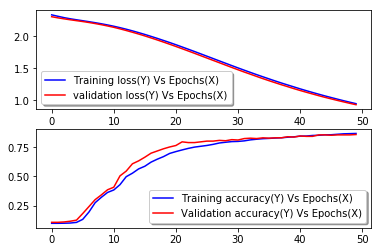

In [24]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss(Y) Vs Epochs(X)")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss(Y) Vs Epochs(X)",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy(Y) Vs Epochs(X)")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy(Y) Vs Epochs(X)")
legend = ax[1].legend(loc='best', shadow=True)


In [25]:
#to plot Confusion Matrix
##https://www.kaggle.com/abhishekkrsingh/keras-101-mnist-dataset
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(X_train)

#Y_pred is this array - you can check by Y_pred[1]
#array([0.5873542 , 0.40650836, 0.5396446 , 0.47721234, 0.48955962,
#      0.54455054, 0.4399726 , 0.34644568, 0.3895176 , 0.41124493],
#      dtype=float32)

#becuase confusion matrix works on 1 classification column, but we have 10 cols in Y - 256 : 266, 
#or 10 predicted values of Y in these 10 different columns, so we will convert them to single column using argmax function
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#But first convert it to array, because type(y_train) is DF and argmax doesnot work on DF
y_train = np.asarray(y_train)

Y_true = np.argmax(y_train,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print(confusion_mtx)


[[130   0   0   0   1   0   1   0   1   0]
 [  0 102   4   2   0   2   1  19   0   1]
 [  0   7 108   0   1   0   4   0   4   1]
 [  0   4   1 107   0   2   0   1   4   5]
 [  2   5   0   0 108   2   2   4   0   3]
 [  1   0   1   3   1 117   3   3   2   0]
 [  5   2   1   0   1   1 125   0   0   0]
 [  0   4   0   0   3   0   1 112   2   4]
 [  0   3   3   3   0   3   1   3 104   0]
 [  1   1   0  16   2   3   0   4   4  92]]


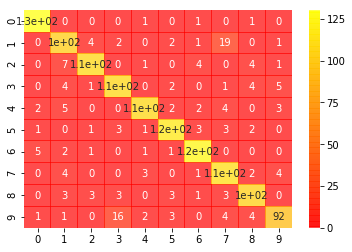

In [26]:
#plotting the confusion matrix
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, cmap = 'autumn', alpha=0.7)

# NN2: 50 hidden layers

In [27]:
# initialize ANN
model = Sequential()

#Add hidden layer with n = 50
model.add(Dense(50, activation = 'sigmoid', input_shape = (n_cols,),  bias_initializer = keras.initializers.Ones() ))

# Add output layer : output_dim = 10 means output layer has 10 nodes
model.add(Dense(10, activation = 'sigmoid'))

#compiling the model
my_optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

#Running model for 50 epochs on train data set
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data = (X_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 13,360
Trainable params: 13,360
Non-trainable params: 0
_________________________________________________________________
Train on 1274 samples, validate on 319 samples
Epoch 1/50
 - 0s - loss: 2.3144 - acc: 0.1028 - val_loss: 2.2997 - val_acc: 0.0972
Epoch 2/50
 - 0s - loss: 2.2924 - acc: 0.1052 - val_loss: 2.2828 - val_acc: 0.1003
Epoch 3/50
 - 0s - loss: 2.2725 - acc: 0.1405 - val_loss: 2.2692 - val_acc: 0.1755
Epoch 4/50
 - 0s - loss: 2.2566 - acc: 0.2237 - val_loss: 2.2541 - val_acc: 0.2163
Epoch 5/50
 - 0s - loss: 2.2402 - acc: 0.2527 - val_loss: 2.2366 - val_acc: 0.2571
Epoch 6/50
 - 0s - loss: 2.2223 - acc: 0.2967 - val_loss: 2.2162 - val_a

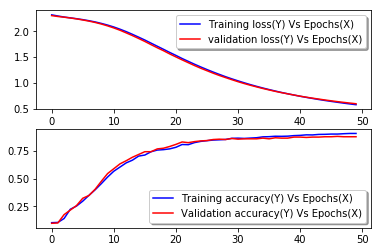

In [29]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss(Y) Vs Epochs(X)")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss(Y) Vs Epochs(X)",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy(Y) Vs Epochs(X)")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy(Y) Vs Epochs(X)")
legend = ax[1].legend(loc='best', shadow=True)

In [30]:
#to plot Confusion Matrix
##https://www.kaggle.com/abhishekkrsingh/keras-101-mnist-dataset
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(X_train)

#Y_pred is this array - you can check by Y_pred[1]
#array([0.5873542 , 0.40650836, 0.5396446 , 0.47721234, 0.48955962,
#      0.54455054, 0.4399726 , 0.34644568, 0.3895176 , 0.41124493],
#      dtype=float32)

#becuase confusion matrix works on 1 classification column, but we have 10 cols in Y - 256 : 266, 
#or 10 predicted values of Y in these 10 different columns, so we will convert them to single column using argmax function
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#But first convert it to array, because type(y_train) is DF and argmax doesnot work on DF
y_train = np.asarray(y_train)

Y_true = np.argmax(y_train,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print(confusion_mtx)

[[130   0   0   0   1   0   1   0   1   0]
 [  0 111   1   2   1   2   0  14   0   0]
 [  0   2 114   0   3   0   1   0   4   1]
 [  0   4   0 112   0   1   0   1   0   6]
 [  0   6   0   0 111   3   1   4   0   1]
 [  1   0   1   1   0 124   2   0   1   1]
 [  2   1   1   0   2   1 128   0   0   0]
 [  0   9   0   0   2   0   1 110   0   4]
 [  0   2   2   2   0   0   1   1 111   1]
 [  0   1   1   8   1   2   0   0   3 107]]


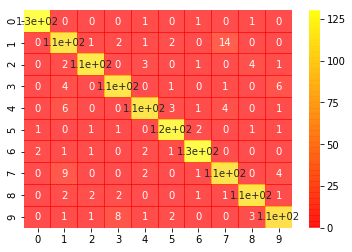

In [31]:
#plotting the confusion matrix
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, cmap = 'autumn', alpha=0.7)

# NN3: 100 hidden layers

In [32]:
# initialize ANN
model = Sequential()

#Add hidden layer with n = 100
model.add(Dense(100, activation = 'sigmoid', input_shape = (n_cols,),  bias_initializer = keras.initializers.Ones() ))

# Add output layer : output_dim = 10 means output layer has 10 nodes
model.add(Dense(10, activation = 'sigmoid'))

#compiling the model
my_optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

#Running model for 50 epochs on train data set
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data = (X_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________
Train on 1274 samples, validate on 319 samples
Epoch 1/50
 - 0s - loss: 2.3703 - acc: 0.0989 - val_loss: 2.3083 - val_acc: 0.1003
Epoch 2/50
 - 0s - loss: 2.2976 - acc: 0.0989 - val_loss: 2.2796 - val_acc: 0.1003
Epoch 3/50
 - 0s - loss: 2.2806 - acc: 0.0989 - val_loss: 2.2701 - val_acc: 0.1003
Epoch 4/50
 - 0s - loss: 2.2697 - acc: 0.0989 - val_loss: 2.2611 - val_acc: 0.1003
Epoch 5/50
 - 0s - loss: 2.2584 - acc: 0.0989 - val_loss: 2.2496 - val_acc: 0.1003
Epoch 6/50
 - 0s - loss: 2.2458 - acc: 0.0989 - val_loss: 2.2362 - val_a

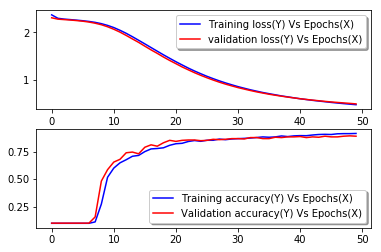

In [36]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss(Y) Vs Epochs(X)")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss(Y) Vs Epochs(X)",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy(Y) Vs Epochs(X)")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy(Y) Vs Epochs(X)")
legend = ax[1].legend(loc='best', shadow=True)

In [37]:
#to plot Confusion Matrix
##https://www.kaggle.com/abhishekkrsingh/keras-101-mnist-dataset
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(X_train)

#Y_pred is this array - you can check by Y_pred[1]
#array([0.5873542 , 0.40650836, 0.5396446 , 0.47721234, 0.48955962,
#      0.54455054, 0.4399726 , 0.34644568, 0.3895176 , 0.41124493],
#      dtype=float32)

#becuase confusion matrix works on 1 classification column, but we have 10 cols in Y - 256 : 266, 
#or 10 predicted values of Y in these 10 different columns, so we will convert them to single column using argmax function
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#But first convert it to array, because type(y_train) is DF and argmax doesnot work on DF
y_train = np.asarray(y_train)

Y_true = np.argmax(y_train,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print(confusion_mtx)

[[131   0   0   0   1   0   0   0   1   0]
 [  0 114   0   2   0   2   1  12   0   0]
 [  0   2 117   0   2   0   0   0   3   1]
 [  0   4   0 112   0   2   0   0   2   4]
 [  0   5   0   0 113   1   2   4   0   1]
 [  1   0   1   1   0 124   2   1   1   0]
 [  2   1   0   0   2   1 129   0   0   0]
 [  0   4   0   0   2   0   1 114   2   3]
 [  0   2   2   1   0   1   0   1 112   1]
 [  0   1   0  10   2   1   0   1   5 103]]


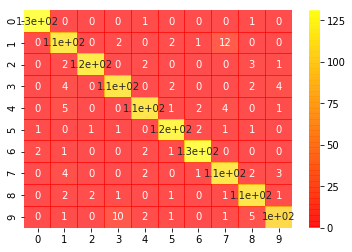

In [38]:
#plotting the confusion matrix
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, cmap = 'autumn', alpha=0.7)

# QnA for part1

1a Conduct experiments with n = 20, 50 and 100. (Hint: remember to include
bias unit weights).....DONE above

1b Give a plot of both training and test accuracy as a function of epoch number
(graph both of these on sample plot)......DONE above

1c Discuss your results. How does number of hidden units affect the final
accuracy on the test data?
N is the number of hidden units 
At N = 20, accuracy_train = 0.7920, accuracy_test = 0.8088
At N = 50, accuracy_train = 0.9003, accuracy_test = 0.8809
At N = 100, accuracy_train = 0.9113, accuracy_test = 0.9028
We can claerly observe that keeping all hyper parameters constant, with the increase in number of hidden layers, 
accuarcy on test and train data increases.
When a neural network has too few hidden neurons, it does not have the capacity to learn enough of the underlying patterns to distinguish between 0 – 9 effectively. When the neural network has more number of neurons at hidden layer, the neural network start to do better. 

1d Discuss your results. How does number of hidden units affect number of
epochs needed for training to converge?
More the number of epochs, more time neural network will take to run.

1e Is there any evidence that any of your networks overfit to the training data? If
so, what is the evidence?
Overfitting means when i get better accuracy at training data than test data. In all the 3 scenerios above, where we used hidden units as 20, 50 and 100, we have accuracy on training data a bit higher than test data, which shows the evidence of slight overfitting. Also in each of the graphs plotted above, the blue line(training accuracy) is above the red line (test accuracy), showing train accuarcy value is higher than test accuracy value.


#  END of Q1 ################################

In [39]:
#Q2 - fix number of hidden units = 100 and train data with 0.25 

In [40]:
#Check number of rows and columns - 1593 rows and 266 columns
df.shape

(1593, 266)

# NN4: training data = 0.25 and hidden nodes = 100

In [41]:
#initial 256 columns are stored in X variable and remaining in Y variable
#number of colums are the number of input nodes
X = df.iloc[:,0:256]
y = df.iloc[:,256:266]

#train- test data split
#Stratify = y will preserve the dataset proportions for better prediction and reproduceability of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42, stratify=y)

In [42]:
#reshape function does not work on dataframe, got error in next step. therefore, I first converted DF to array 
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [43]:
# Flatten the images
image_vector_size = 16*16
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [44]:
num_classes = 10
n_cols = X_train.shape[1]
print(n_cols)

256


In [45]:
# initialize ANN
model = Sequential()

#Add hidden layer with n = 100
model.add(Dense(100, activation = 'sigmoid', input_shape = (n_cols,), bias_initializer = keras.initializers.Ones() ))

# Add output layer : output_dim = 10 means output layer has 10 nodes
model.add(Dense(10, activation = 'sigmoid'))

#compiling the model
my_optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

#Running model for 50 epochs on train data set
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data = (X_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________
Train on 398 samples, validate on 1195 samples
Epoch 1/50
 - 0s - loss: 2.4068 - acc: 0.1005 - val_loss: 2.3836 - val_acc: 0.1013
Epoch 2/50
 - 0s - loss: 2.3639 - acc: 0.1005 - val_loss: 2.3430 - val_acc: 0.1013
Epoch 3/50
 - 0s - loss: 2.3286 - acc: 0.1005 - val_loss: 2.3221 - val_acc: 0.1013
Epoch 4/50
 - 0s - loss: 2.3126 - acc: 0.1005 - val_loss: 2.3112 - val_acc: 0.1013
Epoch 5/50
 - 0s - loss: 2.3034 - acc: 0.1005 - val_loss: 2.3027 - val_acc: 0.1079
Epoch 6/50
 - 0s - loss: 2.2947 - acc: 0.1106 - val_loss: 2.2952 - val_a

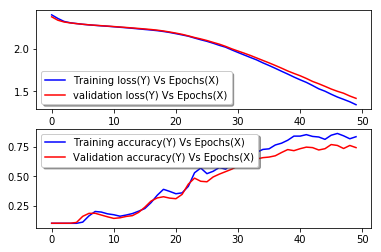

In [46]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss(Y) Vs Epochs(X)")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss(Y) Vs Epochs(X)",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy(Y) Vs Epochs(X)")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy(Y) Vs Epochs(X)")
legend = ax[1].legend(loc='best', shadow=True)

In [47]:
#to plot Confusion Matrix
##https://www.kaggle.com/abhishekkrsingh/keras-101-mnist-dataset
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(X_train)

#Y_pred is this array - you can check by Y_pred[1]
#array([0.5873542 , 0.40650836, 0.5396446 , 0.47721234, 0.48955962,
#      0.54455054, 0.4399726 , 0.34644568, 0.3895176 , 0.41124493],
#      dtype=float32)

#becuase confusion matrix works on 1 classification column, but we have 10 cols in Y - 256 : 266, 
#or 10 predicted values of Y in these 10 different columns, so we will convert them to single column using argmax function
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#But first convert it to array, because type(y_train) is DF and argmax doesnot work on DF
y_train = np.asarray(y_train)

Y_true = np.argmax(y_train,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print(confusion_mtx)

[[38  0  0  0  0  0  0  0  2  0]
 [ 0 38  0  0  0  0  1  1  0  0]
 [ 0  5 24  1  0  1  2  1  6  0]
 [ 0  1  0 36  0  0  0  0  3  0]
 [ 0  3  0  0 36  0  0  1  0  0]
 [ 0  0  0  1  0 39  0  0  0  0]
 [ 0  0  0  0  1  0 39  0  0  0]
 [ 0  7  0  0  0  0  0 33  0  0]
 [ 0  4  0  4  0  3  2  0 26  0]
 [ 3  2  0  6  0  3  0  0  2 23]]


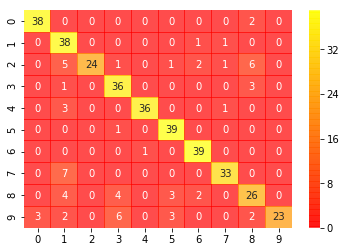

In [48]:
#plotting the confusion matrix
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, cmap = 'autumn', alpha=0.7)

# NN5: training data = 0.50 and hidden nodes = 100

In [49]:
#initial 256 columns are stored in X variable and remaining in Y variable
#number of colums are the number of input nodes
X = df.iloc[:,0:256]
y = df.iloc[:,256:266]

#train- test data split
#Stratify = y will preserve the dataset proportions for better prediction and reproduceability of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42, stratify=y)

In [50]:
#reshape function does not work on dataframe, got error in next step. therefore, I first converted DF to array 
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [51]:
# Flatten the images
image_vector_size = 16*16
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [52]:
num_classes = 10
n_cols = X_train.shape[1]
print(n_cols)

256


In [53]:
# initialize ANN
model = Sequential()

#Add hidden layer with n = 100
model.add(Dense(100, activation = 'sigmoid', input_shape = (n_cols,), bias_initializer = keras.initializers.Ones() ))

# Add output layer : output_dim = 10 means output layer has 10 nodes
model.add(Dense(10, activation = 'sigmoid'))

#compiling the model
my_optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

#Running model for 50 epochs on train data set
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data = (X_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________
Train on 796 samples, validate on 797 samples
Epoch 1/50
 - 0s - loss: 2.3470 - acc: 0.0729 - val_loss: 2.3231 - val_acc: 0.0665
Epoch 2/50
 - 0s - loss: 2.3100 - acc: 0.0766 - val_loss: 2.2957 - val_acc: 0.0728
Epoch 3/50
 - 0s - loss: 2.2876 - acc: 0.0879 - val_loss: 2.2827 - val_acc: 0.1054
Epoch 4/50
 - 0s - loss: 2.2752 - acc: 0.1269 - val_loss: 2.2727 - val_acc: 0.1230
Epoch 5/50
 - 0s - loss: 2.2647 - acc: 0.1445 - val_loss: 2.2619 - val_acc: 0.1556
Epoch 6/50
 - 0s - loss: 2.2522 - acc: 0.1834 - val_loss: 2.2493 - val_ac

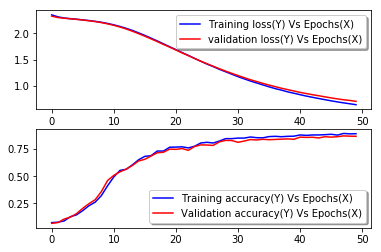

In [54]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss(Y) Vs Epochs(X)")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss(Y) Vs Epochs(X)",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy(Y) Vs Epochs(X)")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy(Y) Vs Epochs(X)")
legend = ax[1].legend(loc='best', shadow=True)

In [55]:
#to plot Confusion Matrix
##https://www.kaggle.com/abhishekkrsingh/keras-101-mnist-dataset
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(X_train)

#Y_pred is this array - you can check by Y_pred[1]
#array([0.5873542 , 0.40650836, 0.5396446 , 0.47721234, 0.48955962,
#      0.54455054, 0.4399726 , 0.34644568, 0.3895176 , 0.41124493],
#      dtype=float32)

#becuase confusion matrix works on 1 classification column, but we have 10 cols in Y - 256 : 266, 
#or 10 predicted values of Y in these 10 different columns, so we will convert them to single column using argmax function
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#But first convert it to array, because type(y_train) is DF and argmax doesnot work on DF
y_train = np.asarray(y_train)

Y_true = np.argmax(y_train,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print(confusion_mtx)

[[78  0  0  0  1  0  0  0  1  0]
 [ 0 65  0  1  1  1  1 11  0  1]
 [ 0  3 71  0  1  0  3  1  1  0]
 [ 0  2  0 73  0  0  0  0  1  4]
 [ 0  2  0  0 74  1  0  3  0  0]
 [ 0  0  0  2  1 76  0  0  0  0]
 [ 0  0  0  0  1  2 77  0  0  0]
 [ 0  5  0  0  2  0  0 71  0  1]
 [ 1  2  4  2  0  3  0  0 64  2]
 [ 2  2  0  9  1  1  0  0  3 61]]


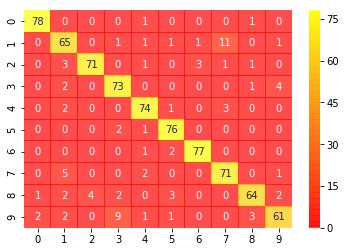

In [56]:
#plotting the confusion matrix
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, cmap = 'autumn', alpha=0.7)

#number 78 in the confusion matrix shows 78 events were correctly predicted as 0 and they were actually 0
#while number 1 (1st row and 5 column) shows 1 event was actually 0 BUT it was wrongly predicted as 4

# Observations:

Conduct experiments by fixing your number of hidden units to 100. Instead
of using all of the training examples, train two networks, using respectively one
quarter and one half of the training examples for training. Make sure that in each
case your training data is approximately balanced among the 10 different
classes....DONE above for NN4 and NN5 model

Give a plot of both training and test accuracy as a function of epoch number
(graph both of these on sample plot)...as shown above

Finding on the effect of size of training data on the final accuracy
of test data?
With 0.25-0.75 percent of training-test data split, the accuracy was low as compared to 0.50-0.50 training-test data split. On the basis of these results, we can say that more training data and less test data results in better accuracy. 
When a neural network has more training data set, it does not have the capacity to learn enough of the underlying patterns to distinguish between 0 – 9 effectively. As a result, the neural network starts to do better.

Finding on the size of training data affecting number of epochs
needed for training to converge? More the number of epochs, it will take more time to run the model.


Overfitting
In simple terms, Overfitting means when we get better accuracy at training data than test data. In both neural networks of 100 hidden layer nodes and 50 epochs, NN4 and NN5 above, but with different test-train split, we have accuracy on training data a bit higher than test data, which shows the evidence of some overfitting. Also in each of the graphs plotted above, the blue line(training accuracy) is above the red line (test accuracy), showing train accuarcy value is higher than test accuracy value. 
 

In [149]:
#initial 256 columns are stored in X variable and remaining in Y variable
#number of colums are the number of input nodes
X = df.iloc[:,0:256]
y = df.iloc[:,256:266]

#train- test data split
#Stratify = y will preserve the dataset proportions for better prediction and reproduceability of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

In [150]:
#reshape function does not work on dataframe, got error in next step. therefore, I first converted DF to array 
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [151]:
# Flatten the images
image_vector_size = 16*16
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [152]:
# initialize ANN
model = Sequential()

#Add hidden layer with n = 510
model.add(Dense(510, activation = 'sigmoid', input_shape = (n_cols,) ))

# Add output layer : output_dim = 10 means output layer has 10 nodes
model.add(Dense(10, activation = 'sigmoid'))

#compiling the model
my_optimizer = optimizers.Adam(lr=0.001, decay=1e-6)
#my_optimizer = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

#Running model for 50 epochs on train data set
history = model.fit(X_train, y_train, batch_size=128, epochs=52, verbose=2, validation_data = (X_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 510)               131070    
_________________________________________________________________
dense_84 (Dense)             (None, 10)                5110      
Total params: 136,180
Trainable params: 136,180
Non-trainable params: 0
_________________________________________________________________
Train on 1433 samples, validate on 160 samples
Epoch 1/52
 - 2s - loss: 2.1558 - acc: 0.3057 - val_loss: 1.8395 - val_acc: 0.6750
Epoch 2/52
 - 0s - loss: 1.5941 - acc: 0.7425 - val_loss: 1.3117 - val_acc: 0.7750
Epoch 3/52
 - 0s - loss: 1.1151 - acc: 0.7920 - val_loss: 0.9512 - val_acc: 0.8438
Epoch 4/52
 - 0s - loss: 0.8136 - acc: 0.8646 - val_loss: 0.7517 - val_acc: 0.8313
Epoch 5/52
 - 0s - loss: 0.6372 - acc: 0.8814 - val_loss: 0.6291 - val_acc: 0.8500
Epoch 6/52
 - 0s - loss: 0.5246 - acc: 0.9016 - val_loss: 0.5523 - val

#with hidden layers = 200 
Epoch 50/50
 - 0s - loss: 0.0742 - acc: 0.9982 - val_loss: 0.2943 - val_acc: 0.8954

#with hidden layers = 300
Epoch 50/50
 - 0s - loss: 0.0555 - acc: 0.9982 - val_loss: 0.2898 - val_acc: 0.9017

#with hidden layers = 400
Epoch 50/50
 - 0s - loss: 0.0430 - acc: 0.9991 - val_loss: 0.2848 - val_acc: 0.9100

#with hidden layers = 500
 Epoch 50/50
 - 0s - loss: 8.8658e-04 - acc: 1.0000 - val_loss: 0.3248 - val_acc: 0.9226

#with hidden layers = 600 ----- accuracy drops drastically
 Epoch 50/50
 - 0s - loss: 1.0195 - acc: 0.1812 - val_loss: 1.4676 - val_acc: 0.1841

#with hidden layers = 510 
 Epoch 50/50
 - 0s - loss: 6.8803e-04 - acc: 1.0000 - val_loss: 0.3429 - val_acc: 0.9289
 
 ########## Optimum number of hidden layers = 510, optimizer = Adam, default bias initializer of zeros, lr = 0.001, train - test split = 90:10
 
 With optimizer = SGD , accuracy drops 

I tried to find optimum hyperparameters by Grid search also but it takes lot of time, 
so I played around with various hyper parameters - 
        number of hidden laters(upto 600), 
        learning rate(0.1, 0.001, 0.02, 0.05), 
        activation function(Relu, SGD,Adam), 
        train-test data split, 
        number of epochs,
        bias initializer 0/1

# Evaluating and improving ANN:
#Using Grid search to get optimum values of hyper parameters

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(50, init = 'uniform', activation = 'relu', input_shape = (n_cols,) ))
    classifier.add(Dense(6, init = 'uniform', activation = 'relu'))
    classifier.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 40)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv=10, n_jobs = -1)



from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
parameters = { 'batch_size':[25, 32],
              'nb_epoch':[100, 500],
              'optimizer':['adam','rmsprop']
              }

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, cv = 10, scoring = 'accuracy')
                          

grid_serach = grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_serach.best_score_
